# imports

In [1]:
import pandas as pd
import numpy as np
import statsmodels as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sfa
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sa
from sklearn.preprocessing import LabelEncoder
import plotly.express as pe
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("darkgrid")
%matplotlib inline

# Data

In [2]:
df = pd.read_csv('./ToyotaCorolla.csv',encoding='unicode_escape')
df.head()

Id                                           Model  Price  Age_08_04   
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23  \
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock   
0         10      2002  46986    Diesel  90          1  ...            1  \
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model   
0                1               1      0          0            0  \
1                0               1      0          0            0   
2                0               1      0          0            0   
3                0               1      0          0            0   
4                1               1      0          1            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  
2                 1             0               0        0  
3                 1             0               0        0  
4                 1             0               0        0  

[5 rows x 38 columns]

Columns to consider "Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"

In [3]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [4]:
df.describe()

Price    Age_08_04             KM           HP           cc   
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000  \
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

## Check for null & duplicates

In [5]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [6]:
df[df.duplicated(keep=False)]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
112  24950          8  13253  116  2000      5      5            234    1320
113  24950          8  13253  116  2000      5      5            234    1320

In [7]:
# delete one of the  duplicate
df.drop(index=[113],inplace=True)

## Check for outliers

In [8]:
pe.box(df['Age_08_04'])
    

*Outliers in lower region for Age (<6)*

In [9]:
df[(df['Age_08_04']<6) | (df['Age_08_04']>80)]
df.drop(index=df[(df['Age_08_04']<6) | (df['Age_08_04']>80)].index,inplace=True)

In [10]:
pe.box(df['KM'])

*Outlier in upper region for KM (>151.3k)*

In [11]:
df[(df['KM']>151300) | (df['KM']<1)]
df.drop(index=df[(df['KM']>151300) | (df['KM']<1)].index,inplace=True)

In [12]:
pe.box(df['HP'])

*Outlier in upper region for HP (>116)*

In [13]:
df[(df['HP']>116) | (df['HP']<69)]
df.drop(index=df[(df['HP']>116) | (df['HP']<69)].index,inplace=True)

In [14]:
pe.box(df['cc'])

*Outlier in upper region for cc (>1900)*

In [15]:
df[(df['cc']>1900) | ((df['cc']<1300))]
df.drop(index=df[(df['cc']>1900) | ((df['cc']<1300))].index,inplace=True)

In [16]:
pe.box(df['Doors'])

*No outliers in Doors*

In [17]:
pe.box(df['Gears'])

*Outlier in upper and lower region for Gears (><5)*

In [18]:
df[df['Gears']!=5]
df.drop(index=df[df['Gears']!=5].index,inplace=True)

In [19]:
pe.box(df['Quarterly_Tax'])

*Outlier in both region of Quaterly_tax (>100 , <64)*

In [20]:
df[(df['Quarterly_Tax']>100) | (df['Quarterly_Tax']<64)]
df.drop(index=df[(df['Quarterly_Tax']>100) | (df['Quarterly_Tax']<64)].index,inplace=True)

In [21]:
pe.box(df['Weight'])

*Outlier in upper region (>1150)

In [22]:
df[(df['Weight']>1135) | (df['Weight']<1000)]
df.drop(index=df[(df['Weight']>1135) | (df['Weight']<1000)].index,inplace=True)

# viz

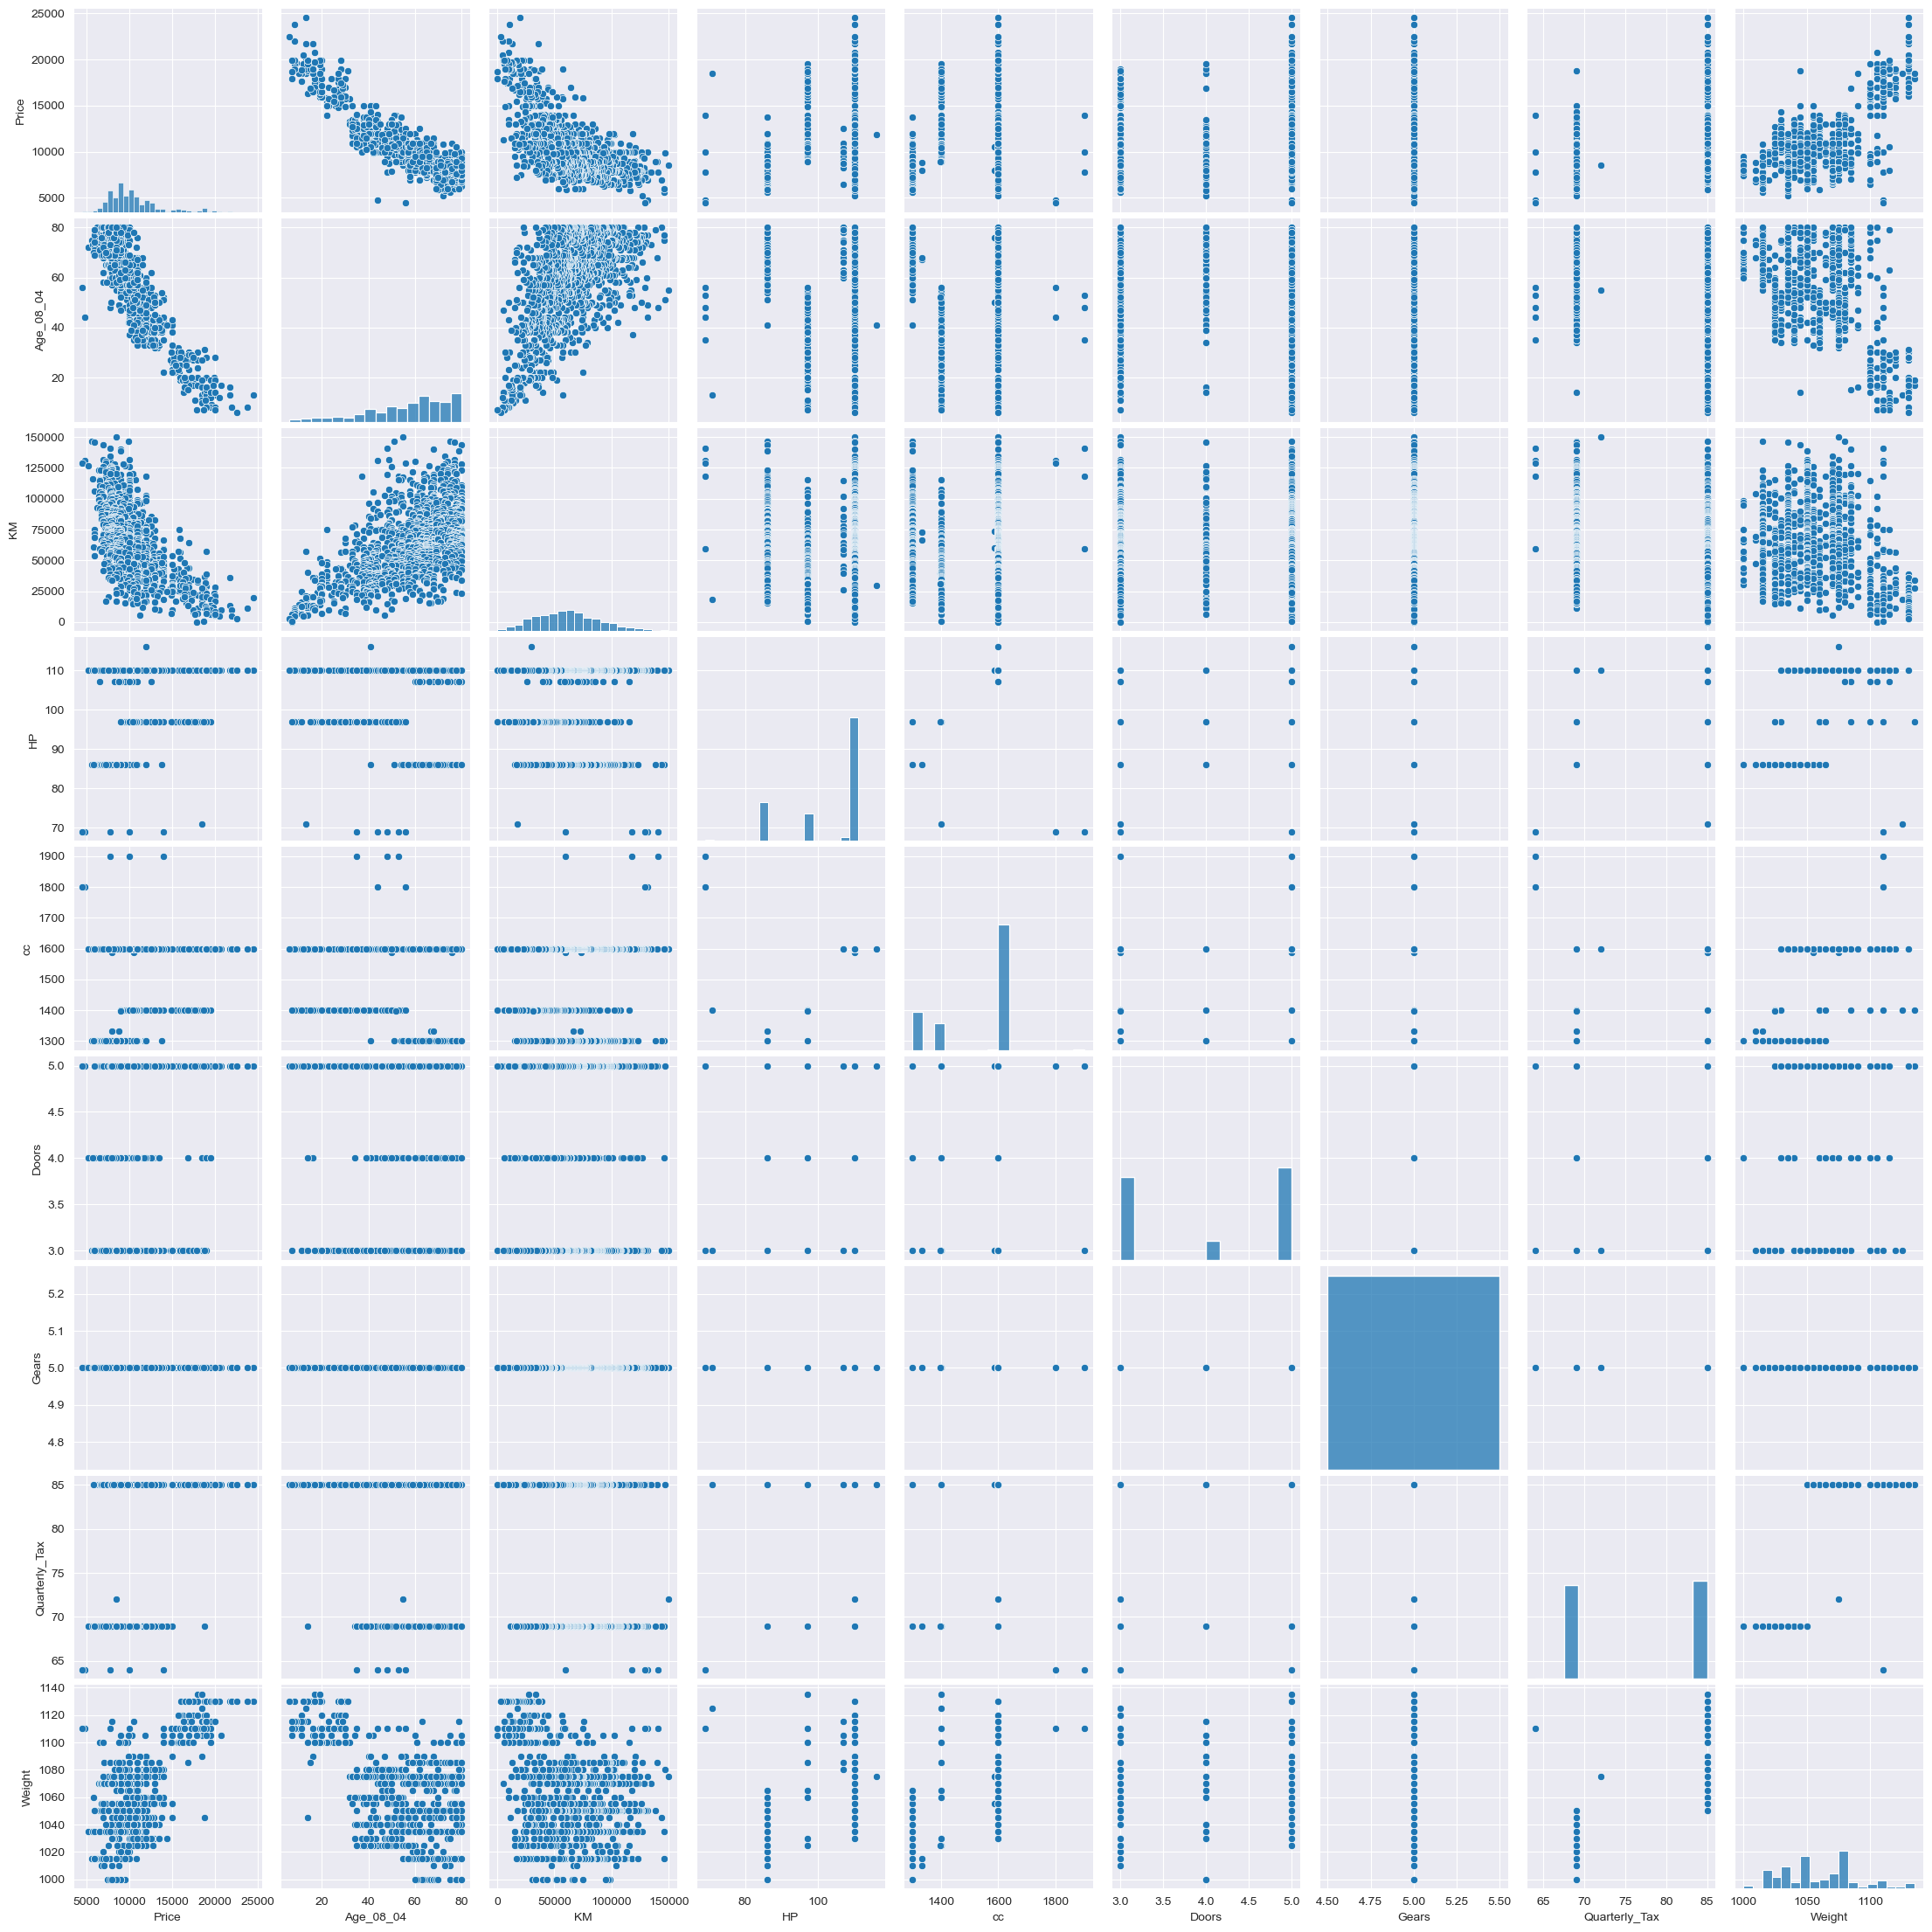

In [23]:
sns.pairplot(df)

<Axes: >

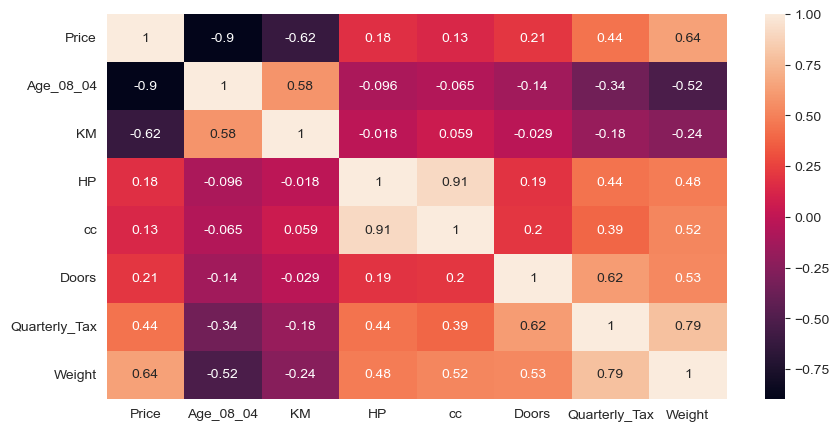

In [24]:
sns.heatmap(df[["Price","Age_08_04","KM","HP","cc","Doors","Quarterly_Tax","Weight"]].corr(),annot=True)

*Correlation matrix with target column*

<Axes: >

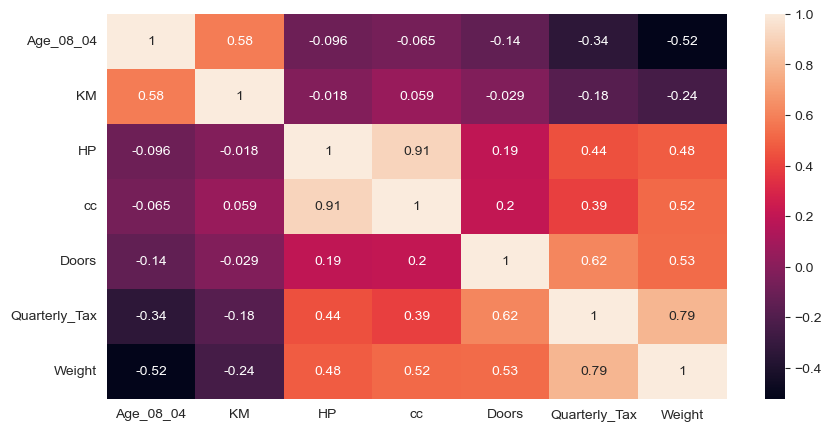

In [25]:
sns.heatmap(df[["Age_08_04","KM","HP","cc","Doors","Quarterly_Tax","Weight"]].corr(),annot=True)

*Correlation matrix without target column*

# model Building

In [26]:
for i in df.columns[1:]:
    print(f'{i}',end='+')

Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight+

In [27]:
model = sfa.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df).fit()

In [28]:
model.rsquared

0.8740299518616288

In [29]:
model.params

Intercept        -798.462210
Age_08_04        -109.190190
KM                 -0.016276
HP                 58.437792
cc                 -5.934348
Doors             -87.683515
Gears           -3992.311052
Quarterly_Tax     -36.808238
Weight             42.196250
dtype: float64

# VIF

In [30]:
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
17    17950         24  21716  110  1600      3      5             85    1105
19    16950         30  64359  110  1600      3      5             85    1105
20    15950         30  67660  110  1600      3      5             85    1105
22    15950         28  56349  110  1600      3      5             85    1120
23    16950         28  32220  110  1600      3      5             85    1120
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1430   8450         80  23000   86  1300      3      5             69    1015
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015

[1127 rows x 9 columns]

In [31]:
X = df.drop('Price',axis=1)

In [32]:
X

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
17           24  21716  110  1600      3      5             85    1105
19           30  64359  110  1600      3      5             85    1105
20           30  67660  110  1600      3      5             85    1105
22           28  56349  110  1600      3      5             85    1120
23           28  32220  110  1600      3      5             85    1120
...         ...    ...  ...   ...    ...    ...            ...     ...
1430         80  23000   86  1300      3      5             69    1015
1431         69  20544   86  1300      3      5             69    1025
1432         72  19000   86  1300      3      5             69    1015
1433         71  17016   86  1300      3      5             69    1015
1434         70  16916   86  1300      3      5             69    1015

[1127 rows x 8 columns]

In [33]:
vif_stat = pd.DataFrame()
vif_stat['Feature'] = X.columns
vif_stat['vif'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_stat

Feature          vif
0      Age_08_04     2.146354
1             KM     1.572370
2             HP     6.695528
3             cc     7.350297
4          Doors     1.722635
5          Gears  3867.897022
6  Quarterly_Tax     3.603730
7         Weight     4.637895

*As Observed Gears have very high variance inflation factor*

## Subset collection

In [34]:
g_model = sfa.ols('Price~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',data=df).fit()

In [35]:
g_model.rsquared

0.8740299518616287

In [36]:
g_model.aic

18969.045859144295

**Observation**
* *We get same r^2 value even if we drop the gears feature*

# Lets also try transformed data models

In [37]:
# sqrt transformation
sqrt_df = pd.DataFrame()
for i in df.columns[1:]:
    if i != 'Gears':
        # not going to use Gears since high vif
        sqrt_df[f'sqrt_{i}'] = np.sqrt(df[i])
sqrt_df['Price'] = df['Price']
sqrt_df.head()

sqrt_Age_08_04     sqrt_KM    sqrt_HP  sqrt_cc  sqrt_Doors   
17        4.898979  147.363496  10.488088     40.0    1.732051  \
19        5.477226  253.690757  10.488088     40.0    1.732051   
20        5.477226  260.115359  10.488088     40.0    1.732051   
22        5.291503  237.379443  10.488088     40.0    1.732051   
23        5.291503  179.499304  10.488088     40.0    1.732051   

    sqrt_Quarterly_Tax  sqrt_Weight  Price  
17            9.219544    33.241540  17950  
19            9.219544    33.241540  16950  
20            9.219544    33.241540  15950  
22            9.219544    33.466401  15950  
23            9.219544    33.466401  16950

In [38]:
sq_model = sfa.ols('Price~sqrt_Age_08_04+sqrt_KM+sqrt_HP+sqrt_cc+sqrt_Doors+sqrt_Quarterly_Tax+sqrt_Weight',data=sqrt_df).fit()

In [39]:
sq_model.rsquared

0.8821230910402698

**Observation**<br>
*Model on Sqrt transformed data performs better than our previous model*

In [40]:
#log transformation
lg_df = pd.DataFrame()
for i in df.columns[1:]:
    if i != 'Gears':
        lg_df[f'log_{i}'] = np.log(df[i])
lg_df['Price'] = df['Price']
lg_df

log_Age_08_04     log_KM    log_HP    log_cc  log_Doors   
17         3.178054   9.985805  4.700480  7.377759   1.098612  \
19         3.401197  11.072232  4.700480  7.377759   1.098612   
20         3.401197  11.122250  4.700480  7.377759   1.098612   
22         3.332205  10.939320  4.700480  7.377759   1.098612   
23         3.332205  10.380343  4.700480  7.377759   1.098612   
...             ...        ...       ...       ...        ...   
1430       4.382027  10.043249  4.454347  7.170120   1.098612   
1431       4.234107   9.930324  4.454347  7.170120   1.098612   
1432       4.276666   9.852194  4.454347  7.170120   1.098612   
1433       4.262680   9.741909  4.454347  7.170120   1.098612   
1434       4.248495   9.736015  4.454347  7.170120   1.098612   

      log_Quarterly_Tax  log_Weight  Price  
17             4.442651    7.007601  17950  
19             4.442651    7.007601  16950  
20             4.442651    7.007601  15950  
22             4.442651    7.021084  15950  
23             4.442651    7.021084  16950  
...                 ...         ...    ...  
1430           4.234107    6.922644   8450  
1431           4.234107    6.932448   7500  
1432           4.234107    6.922644  10845  
1433           4.234107    6.922644   8500  
1434           4.234107    6.922644   7250  

[1127 rows x 8 columns]

In [41]:
lg_model = sfa.ols('Price~log_Age_08_04+log_KM+log_HP+log_cc+log_Doors+log_Quarterly_Tax+log_Weight',data=lg_df).fit()

In [42]:
lg_model.rsquared

0.861001535268084

# model Validation

In [43]:
# using sqrt model since it performed well
fmodel = sfa.ols('Price~sqrt_Age_08_04+sqrt_KM+sqrt_HP+sqrt_cc+sqrt_Doors+sqrt_Quarterly_Tax+sqrt_Weight',data=sqrt_df).fit()

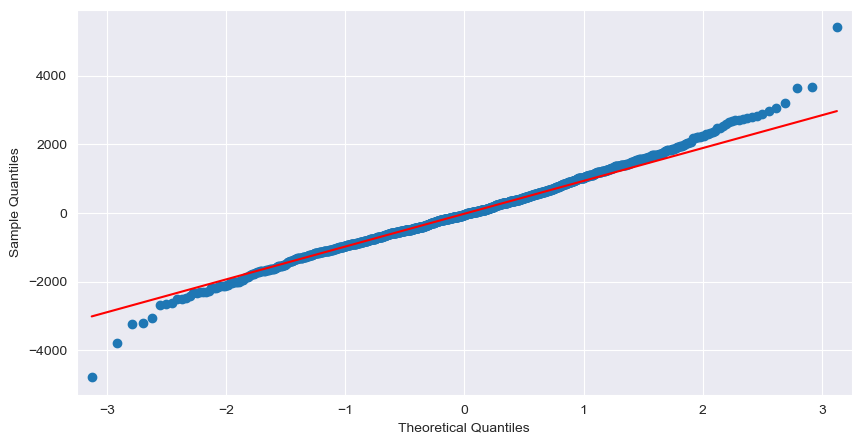

In [44]:
sa.qqplot(fmodel.resid,line='q');

## Model deletion technique

### Cooks distance

In [45]:
inf = fmodel.get_influence()
c,p=inf.cooks_distance

<StemContainer object of 3 artists>

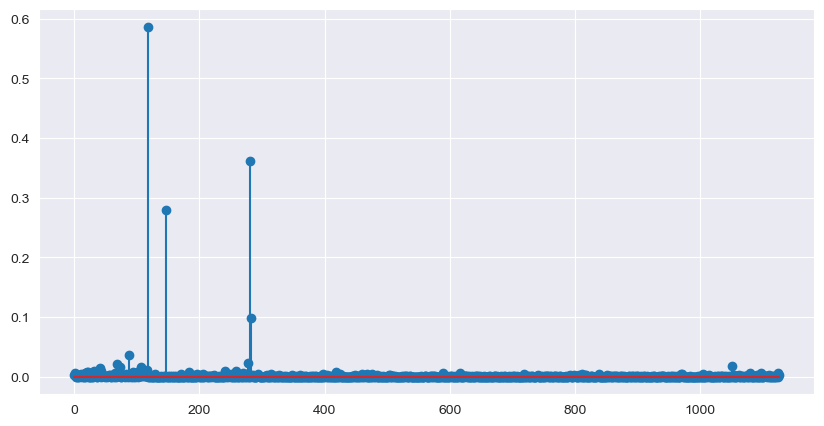

In [46]:
plt.stem(c)

*As observed all the cooks distance values are under the limit value of 1*

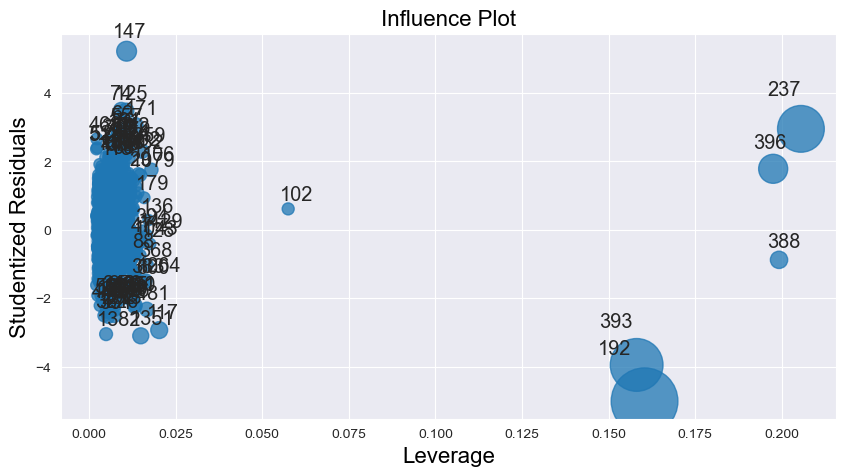

In [47]:
influence_plot(fmodel);

In [48]:
#Calculate cutoff
k = len(sqrt_df.columns)
n = len(sqrt_df)

levarge_cutoff = 3*(k+1)/n
levarge_cutoff

0.023957409050576754

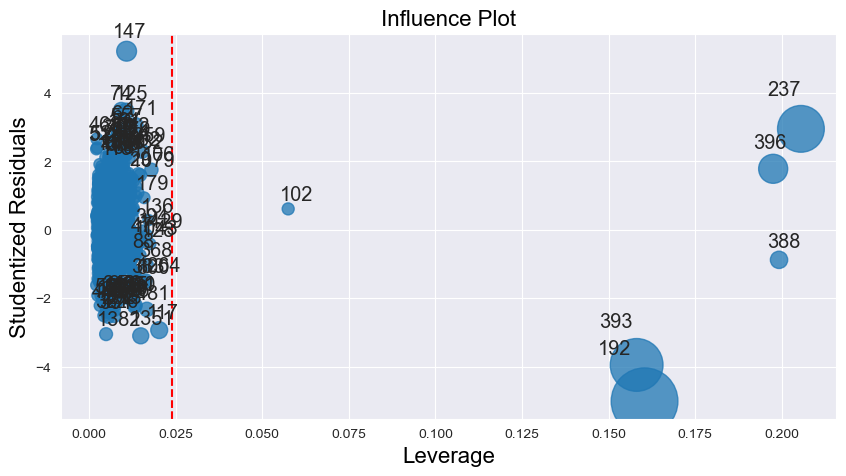

In [49]:
influence_plot(fmodel)
plt.axvline(levarge_cutoff,color = 'red',linestyle = '--')

# Improving model

In [50]:
#drop values which exceed the threshold value
h_val = fmodel.get_influence().hat_matrix_diag # get h leverage value
sqrt_df[h_val>levarge_cutoff] # gives position where h_val crosses threshold


sqrt_Age_08_04     sqrt_KM   sqrt_HP    sqrt_cc  sqrt_Doors   
102        3.605551  134.164079  8.426150  37.416574    1.732051  \
192        6.633250  362.316160  8.306624  42.426407    2.236068   
237        5.916080  243.926218  8.306624  43.588989    1.732051   
388        6.928203  375.099987  8.306624  43.588989    2.236068   
393        7.483315  359.381413  8.306624  42.426407    2.236068   
396        7.280110  343.384624  8.306624  43.588989    2.236068   

     sqrt_Quarterly_Tax  sqrt_Weight  Price  
102            9.219544    33.541020  18500  
192            8.000000    33.316662   4750  
237            8.000000    33.316662  13950  
388            8.000000    33.316662   7750  
393            8.000000    33.316662   4450  
396            8.000000    33.316662   9950

In [51]:
sqrt_df.drop(index=sqrt_df[h_val>levarge_cutoff].index,inplace=True)

In [52]:
sqrt_df.reset_index(inplace=True)

In [53]:
imp_model = sfa.ols('Price~sqrt_Age_08_04+sqrt_KM+sqrt_HP+sqrt_cc+sqrt_Doors+sqrt_Quarterly_Tax+sqrt_Weight',data=sqrt_df).fit()

In [54]:
imp_model.rsquared

0.890001230561178

**Observation**
<br> *We managed to improve model performance from 0.87 to 0.89*

In [55]:
models = [(model,'Base Model'),(g_model,'Model with Gear dropped'),(sq_model,'Model with sqrt data'),
          (lg_model,'Model with log data'),(fmodel,'Model before improvement'),(imp_model,'Final Improved model')]
scr = pd.DataFrame({
    'Models':[x[1] for x in models],
    'R^2 Score' : [m[0].rsquared for m in models]
})
scr

Models  R^2 Score
0                Base Model   0.874030
1   Model with Gear dropped   0.874030
2      Model with sqrt data   0.882123
3       Model with log data   0.861002
4  Model before improvement   0.882123
5      Final Improved model   0.890001